<a href="https://colab.research.google.com/github/greenmantice18/Codeit-Internship-AIML/blob/main/K_means_alogo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Algorithm**

In [ ]:
#IMPORTING DATA
import kagglehub
import pandas as pd
import os
import numpy as np

# Download dataset
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

# Locate and load the CSV
files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, csv_file))

# Show Shape and Table
print(f"Dataset Shape: {df.shape}")
display(df.head())

Using Colab cache for faster access to the 'ccdata' dataset.
Dataset Shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#DATA CLEANSING AND TRAIN TEST SPLIT(80,20)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Handle missing values
df_clean = df.drop('CUST_ID', axis=1)
df_clean.fillna(df_clean.mean(), inplace=True)

# 2. Select Features (Balance vs Purchases for 2D visualization)
X = df_clean[['BALANCE', 'PURCHASES']].values

# 3. Scaling (Crucial for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split (80% Train, 20% Test)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

print("Data cleaning and split complete.")
print(f"Training set: {X_train.shape[0]} rows | Test set: {X_test.shape[0]} rows")

Data cleaning and split complete.
Training set: 7160 rows | Test set: 1790 rows


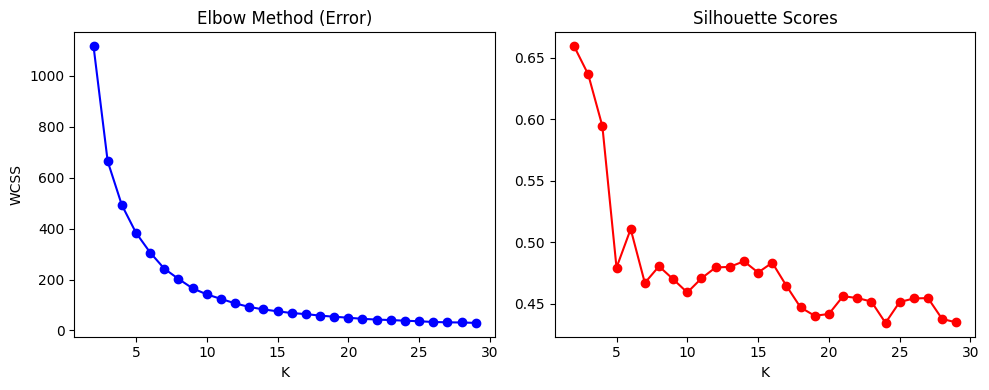

The best predicted value of K based on Silhouette is: 2


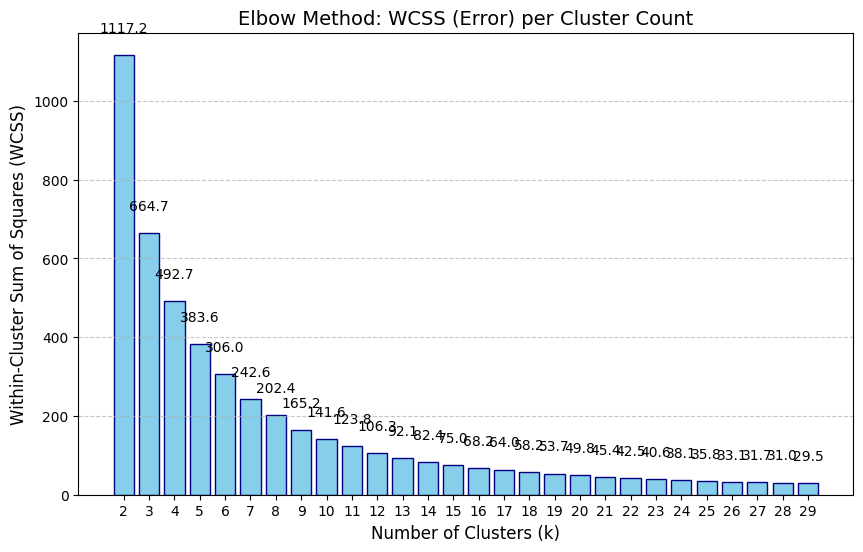

In [ ]:
#Error finding and predicting the best k
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
sil_scores = []
k_range = range(2, 30)

for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = km.fit_predict(X_train)
    wcss.append(km.inertia_)
    sil_scores.append(silhouette_score(X_train, labels))

# Plotting Error (WCSS)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', color='blue')
plt.title('Elbow Method (Error)')
plt.xlabel('K')
plt.ylabel('WCSS')

# Plotting Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='red')
plt.title('Silhouette Scores')
plt.xlabel('K')

plt.tight_layout()
plt.show()

best_k = k_range[np.argmax(sil_scores)]
print(f"The best predicted value of K based on Silhouette is: {best_k}")
import matplotlib.pyplot as plt

# 1. Create the Bar Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(k_range, wcss, color='skyblue', edgecolor='navy')

# 2. Add labels and titles
plt.title('Elbow Method: WCSS (Error) per Cluster Count', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.xticks(k_range)

# 3. Add data labels on top of bars for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 1), va='bottom', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Using Colab cache for faster access to the 'ccdata' dataset.
Original Shape: (8950, 18)
Random Sample Shape: (1000, 2)


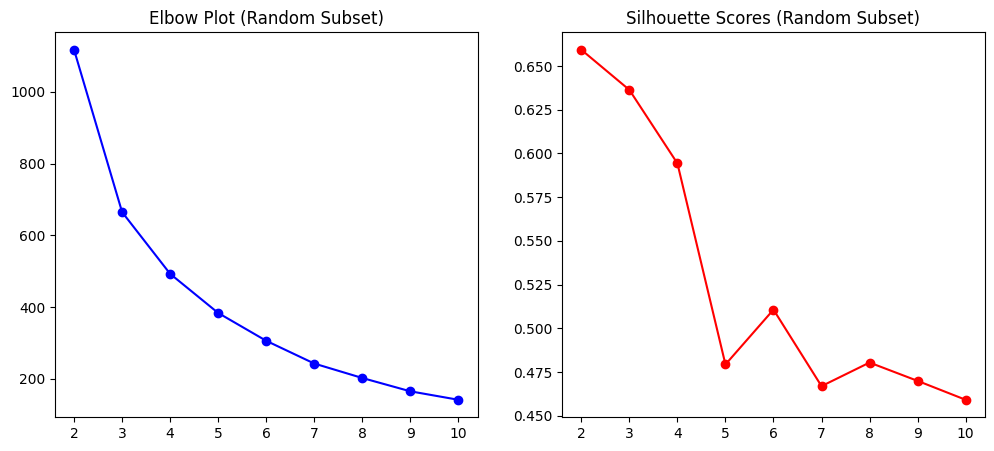

The best predicted value of K for this random subset is: 2


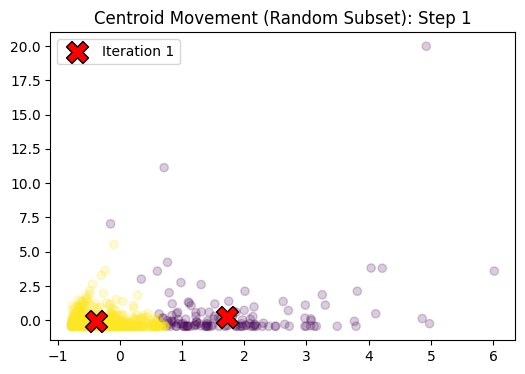

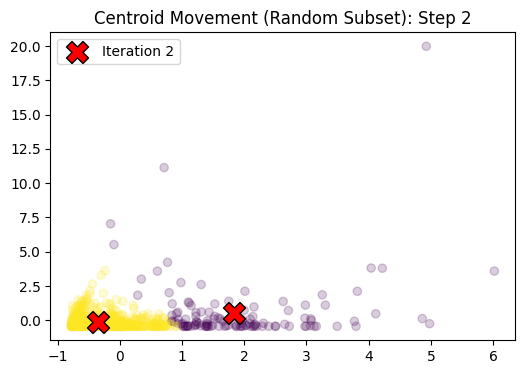

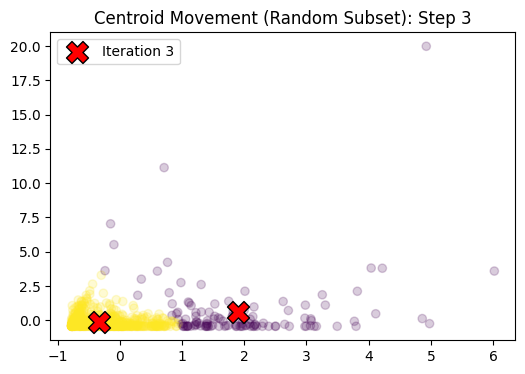

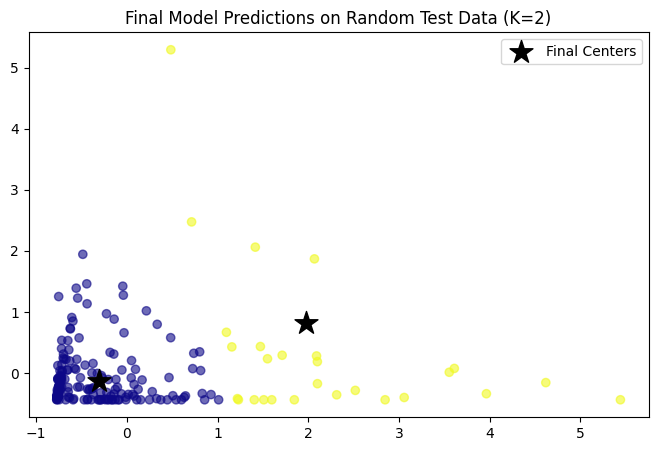

In [ ]:
import kagglehub
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Download and Load
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")
files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]
df_full = pd.read_csv(os.path.join(path, csv_file))

# 2. RANDOM SUBSAMPLING (Choosing 1000 random entries)
df_sample = df_full.sample(n=1000, random_state=42).copy()

# 3. Clean and Scale
df_sample.drop('CUST_ID', axis=1, inplace=True)
df_sample.fillna(df_sample.mean(), inplace=True)

# Select two features for 2D visualization
X = df_sample[['BALANCE', 'PURCHASES']].values
X_scaled = StandardScaler().fit_transform(X)

# 4. Train-Test Split (on the random subset)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

print(f"Original Shape: {df_full.shape}")
print(f"Random Sample Shape: {X_scaled.shape}")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = km.fit_predict(X_train)
    wcss.append(km.inertia_)
    sil_scores.append(silhouette_score(X_train, labels))

# Plotting the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', color='blue')
plt.title('Elbow Plot (Random Subset)')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='red')
plt.title('Silhouette Scores (Random Subset)')
plt.show()

best_k = k_range[np.argmax(sil_scores)]
print(f"The best predicted value of K for this random subset is: {best_k}")

def plot_random_subset_steps(data, k, total_steps):
    for i in range(1, total_steps + 1):
        # Using 'random' initialization to see clear movement
        km_step = KMeans(n_clusters=k, init='random', max_iter=i, n_init=1, random_state=1)
        km_step.fit(data)

        plt.figure(figsize=(6, 4))
        plt.scatter(data[:, 0], data[:, 1], c=km_step.labels_, cmap='viridis', alpha=0.2)
        plt.scatter(km_step.cluster_centers_[:, 0], km_step.cluster_centers_[:, 1],
                    s=250, c='red', marker='X', edgecolors='black', label=f'Iteration {i}')
        plt.title(f"Centroid Movement (Random Subset): Step {i}")
        plt.legend()
        plt.show()


#Prediction & Final Representation
plot_random_subset_steps(X_train, k=best_k, total_steps=3)

final_model = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
final_model.fit(X_train)
test_preds = final_model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, cmap='plasma', alpha=0.6)
plt.scatter(final_model.cluster_centers_[:, 0], final_model.cluster_centers_[:, 1],
            s=300, c='black', marker='*', label='Final Centers')
plt.title(f"Final Model Predictions on Random Test Data (K={best_k})")
plt.legend()
plt.show()

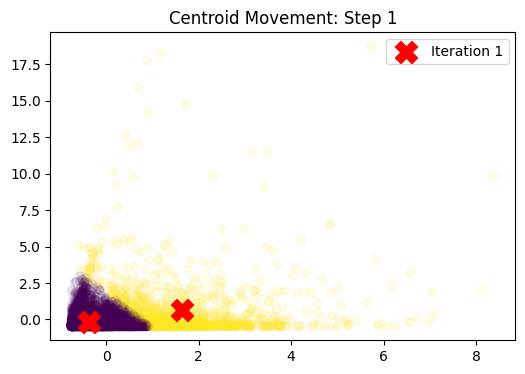

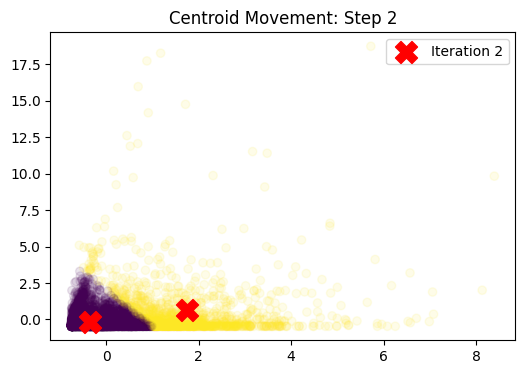

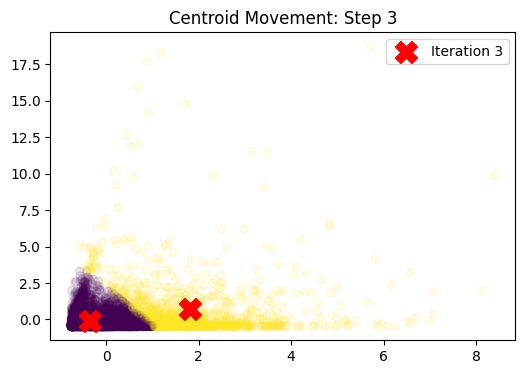

In [ ]:
#Visualization of Centroid Movement (Iteration 1 to N)
def plot_movement(data, k, total_steps):
    for i in range(1, total_steps + 1):
        # We limit 'max_iter' to 'i' to see the progress at each step
        km_step = KMeans(n_clusters=k, init='random', max_iter=i, n_init=1, random_state=1)
        km_step.fit(data)

        plt.figure(figsize=(6, 4))
        plt.scatter(data[:, 0], data[:, 1], c=km_step.labels_, cmap='viridis', alpha=0.1)
        plt.scatter(km_step.cluster_centers_[:, 0], km_step.cluster_centers_[:, 1],
                    s=250, c='red', marker='X', label=f'Iteration {i}')
        plt.title(f"Centroid Movement: Step {i}")
        plt.legend()
        plt.show()

# Change 'steps' to see more or fewer iterations
plot_movement(X_train, k=best_k, total_steps=3)

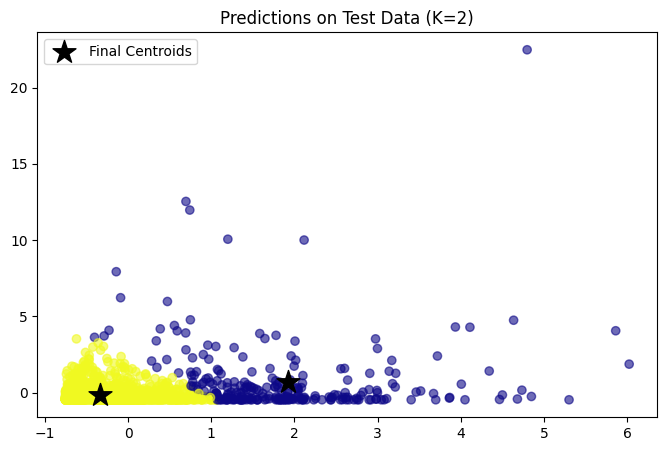

Clustering Process Complete!


In [ ]:
#Final Prediction on Test Data
# Final model trained on X_train
final_model = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
final_model.fit(X_train)

# Prediction on unseen data
test_predictions = final_model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_predictions, cmap='plasma', alpha=0.6)
plt.scatter(final_model.cluster_centers_[:, 0], final_model.cluster_centers_[:, 1],
            s=300, c='black', marker='*', label='Final Centroids')
plt.title(f"Predictions on Test Data (K={best_k})")
plt.legend()
plt.show()

print("Clustering Process Complete!")